In [1]:
# 课堂实验 聚类分析 小demo


In [4]:
import pandas as pd

filedir = 'zscoredata.xls'
data = pd.read_excel(filedir)

In [6]:
# zscoredata文件内是还未标准化的数据
# 咱们把它z-score
# 我特别去查了一下z-score和之前所做的归一化有什么区别（网上经常能看到“标准化”和“归一化”的说法，而且很多人混用）
# 我研究下来大概是这样的：
'''
这些归一化方法都属于“特征工程”中的方法，大致有4种：
1. 缩放到均值为0，方差为1（ Standardization——StandardScaler() ）
2. 缩放到0和1之间（ Standardization——MinMaxScaler() ）
3. 缩放到-1和1之间（ Standardization——MaxAbsScaler() ）
4. 缩放到0和1之间，保留原始数据的分布（ Normalization——Normalizer() ）

实际上z-score属于第一种，第二种就是常用的Min-Max归一化，就不用太纠结“标准化”和“归一化”了 其实他们都是data preprocessing的一部分，
是为了数据服务的，根据数据特点选择合适的就好

'''
##
'''
input

    data  待归一化的数据DataFrame

return

    retData 归一化完成的数据

'''
def zscore(data):
    meanData = data.mean(axis=0) # axis =0 表示行压缩 对每一列求值 返回一个m*1矩阵
    standardData = data.std(axis=0) 
    retData = (data - meanData)/standardData #数据标准化
    return retData

In [7]:
# 测试一下

zscore(data)

# 没问题再继续 自从上次被kNN搞了之后就养成习惯了 数据分析最重要的就是数据不要错

,L,R,F,M,C
0,1.689882,0.140299,-0.635788,0.068794,-0.337186
1,1.689882,-0.322442,0.852453,0.843848,-0.553613
2,1.681743,-0.487707,-0.210576,0.158569,-1.094680
3,1.534185,-0.785184,0.002030,0.273091,-1.148787
4,0.890167,-0.426559,-0.635788,-0.685170,1.231909
...,...,...,...,...,...
62039,0.590805,-0.938881,1.986351,2.694820,-0.499506
62040,0.578774,-0.086114,0.072898,0.163414,0.366201
62041,0.592928,-0.796753,0.710716,1.607265,-0.932360
62042,0.575235,-0.211715,-0.423182,-0.187230,-0.661826


In [37]:
# 画图
import matplotlib.pyplot as plt
import numpy as np
'''
input:
    
    clusterCenters 聚类中心
    
'''
def plotFigure(clusterCenters):
    plot_data = clusterCenters
    angles = np.linspace(0, 2*np.pi, 5, endpoint=False)
    plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis = 1) #闭合
    angles = np.concatenate((angles, [angles[0]])) # 闭合
    fig = plt.figure()
    ax = fig.add_subplot(111)
    color = ["blue","red","green","yellow","black"]
    for i in range(len(plot_data)):
        ax.plot(angles, plot_data[i], 'o-', color = color[i], label = u'客户群'+str(i), linewidth=2) #画线
    ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5), fontproperties="SimHei")#绘制同心圆 
    ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")#在 theta 为 angles * 180/np.pi 的位置上做标记 

In [38]:
# 导入本次实验的主角 k聚类
from sklearn.cluster import KMeans

def clusterTesting( data):
    # 创建模型
    kmodel = KMeans(n_clusters = 5, n_jobs = 4)
    # 数据预处理 z-score
    zscoredata = zscore(data)
    # 导入z-score过后的数据 训练模型
    kmodel.fit(zscoredata)
    # 查看聚类中心
    print(kmodel.cluster_centers_)
    # 将聚类中心数据用于作图
    plotFigure(kmodel.cluster_centers_)
    # 查看样本类别
    print(kmodel.labels_)
    

[[ 0.09625214 -0.01424271 -0.196444   -0.19360088  2.32629181]
 [-0.70300895 -0.41199061 -0.16345779 -0.16395334 -0.23946014]
 [ 1.15216446 -0.37453233 -0.09104173 -0.09924933 -0.15051316]
 [-0.31474866  1.68355084 -0.57401906 -0.53715514 -0.16190732]
 [ 0.48330766 -0.79943435  2.48376041  2.42433932  0.30123685]]


AttributeError: 'AxesSubplot' object has no attribute 'set_rgrids'

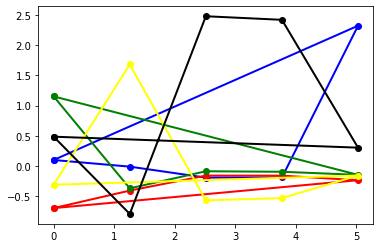

In [39]:
if __name__ == "__main__":
    clusterTesting(data)